In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data description

1. age
2. anaemia: Decrease of red blood cells or hemoglobin
3. creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L), là một enzym chủ yếu thấy ở cơ tim, cơ vân và một lượng ít hơn ở mô não. Vai trò quan trọng của Creatine phosphokinase là kiểm soát dòng cung cấp năng lượng cho nhiều mô khác nhau trong cơ thể, đặc biệt ở mô cơ.
4. diabetes
5. ejection_fraction: Percentage of blood leaving the heart at each contraction
6. high_blood_pressure: If the patient has hypertension (cao huyết áp)
7. platelets: Platelets in the blood (số lượng tiểu cầu trong máu)
8. serum_creatinine: Level of serum creatinine in the blood (Sản phẩm của sự thoái hóa creatin trong các cơ, được đào thải qua thận và là chỉ số phản ánh chính xác chức năng của thận.)
8. serum_sodium: Level of serum sodium in the blood (Sodium is an essential mineral to your body)
9. sex
10. smoking
11. time


In [2]:
df = pd.read_csv("./heart_failure_clinical_records_dataset.csv")

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Data descrtiption

In [3]:
print(f"Number of rows: {df.shape[0]}, number of columns: {df.shape[1]}")
print(f"Columns: {df.columns.values}")

df.info()

Number of rows: 299, number of columns: 13
Columns: ['age' 'anaemia' 'creatinine_phosphokinase' 'diabetes' 'ejection_fraction'
 'high_blood_pressure' 'platelets' 'serum_creatinine' 'serum_sodium' 'sex'
 'smoking' 'time' 'DEATH_EVENT']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  


In [4]:
# Looking for missing values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Feature scaling

## This case minimax scaler will be used. MinMaxScaler rescales the data set such that all feature values are in the range [0, 1] as shown in the right panel below. This scaler are very sensitive to outliers

In [5]:
'''
NOTE: Ouliers detection
Z SCORE

The Z-Score can be used to identify and remove outliers in a dataset. It indicates how many standard deviations away a data point is from the mean. The formula to find the Z-Score for a feature is:

Z = (x-μ)/σ

If the z score of a data point is more than 3, it indicates that the data point is different from the others. Such a data point is an outlier and should be removed
'''
from scipy import stats
z = np.abs(stats.zscore(df))

df = df[((z < 3)).all(axis=1)]

In [6]:
from sklearn.preprocessing import MinMaxScaler

features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

df[features] = MinMaxScaler().fit_transform( df[features] )

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0,0.201732,0,0.117647,1,0.463217,0.358974,0.250000,1,0,0.000000,1
2,0.454545,0,0.044388,0,0.117647,0,0.264337,0.205128,0.208333,1,1,0.010676,1
3,0.181818,1,0.031757,0,0.117647,0,0.357019,0.358974,0.541667,1,0,0.010676,1
5,0.909091,1,0.008661,0,0.509804,1,0.345433,0.410256,0.333333,1,1,0.014235,1
6,0.636364,1,0.080476,0,0.019608,0,0.196756,0.179487,0.541667,1,0,0.021352,1


In [9]:
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

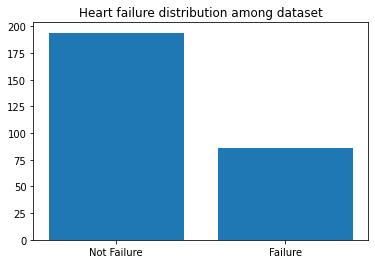

In [10]:
'''
0 means NO
1 means YES
'''

deathEvent = dict(y.value_counts())

counts = deathEvent.values()
labels = ["Not Failure", "Failure"]

plt.bar(labels, counts)

plt.title("Heart failure distribution among dataset")
plt.show()

## We can see that there are some of imbalance in our dataset

## Data resampling
Generally speaking, a resampling method is a tool consisting in repeatedly drawing samples from a dataset and calculating statistics and metrics on each of those samples in order to obtain further information about something, in the machine learning setting, this something is the performance of a model.

### ADASYN, This is a oversampling technique of minority class to address the class imbalance issue. This method is similar to SMOTE but it generates different number of samples depending on an estimate of the local distribution of the class to be oversampled. Read the related paper to understand more on this : https://www.researchgate.net/publication/224330873_ADASYN_Adaptive_Synthetic_Sampling_Approach_for_Imbalanced_Learning

In [17]:
from imblearn.over_sampling import ADASYN

resample = ADASYN(sampling_strategy="all", random_state=42)
resampleX, resampleY = resample.fit_resample(X, y)

In [22]:
## Resample dataset descriotion
print(f"Number of rows: {resampleX.shape[0]}, number of columns: {resampleX.shape[1]}")

resampleX.info()

Number of rows: 374, number of columns: 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       374 non-null    float64
 1   anaemia                   374 non-null    int64  
 2   creatinine_phosphokinase  374 non-null    float64
 3   diabetes                  374 non-null    int64  
 4   ejection_fraction         374 non-null    float64
 5   high_blood_pressure       374 non-null    int64  
 6   platelets                 374 non-null    float64
 7   serum_creatinine          374 non-null    float64
 8   serum_sodium              374 non-null    float64
 9   sex                       374 non-null    int64  
 10  smoking                   374 non-null    int64  
 11  time                      374 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 35.2 KB


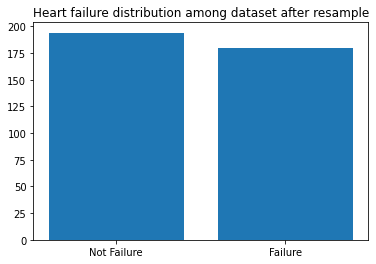

In [24]:
resampleHFCounts = dict(resampleY.value_counts())

counts = resampleHFCounts.values()
labels = ["Not Failure", "Failure"]

plt.bar(labels, counts)

plt.title("Heart failure distribution among dataset after resample")
plt.show()

## Machine Learning Model

In [46]:
# Spliting train and test set
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(resampleX, resampleY, test_size=0.2, random_state=42)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier

from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score

models = [
    ("RF", RandomForestClassifier()),
    ("SVM", SVC()),
    ("KNN", KNeighborsClassifier()),
    ("LR", LogisticRegression()),
    ("RC", RidgeClassifier()),
    ("SGDC", SGDClassifier()),
]

In [48]:
finalResults = []

for name, model in models:
    model.fit(trainX, trainY)
    modelResults = model.predict(testX)
    pscore = precision_score(testY, modelResults, average="macro")
    ascore = accuracy_score(testY, modelResults)
    f1Score = f1_score(testY, modelResults, average=None, labels=[1, 0])
    finalResults.append(( name, pscore, ascore, f1Score ))


finalResults.sort(key=lambda k: k[3][0] + k[3][1], reverse=True)

In [49]:
resultsDF = pd.DataFrame(finalResults, columns=["Model", "Precision Score", "Accuracy score" , "F1 score (Failure, Non-Failure)"])

resultsDF

,Model,Precision Score,Accuracy score,"F1 score (Failure, Non-Failure)"
0,RF,0.867857,0.866667,"[0.8611111111111112, 0.8717948717948718]"
1,SGDC,0.811111,0.800000,"[0.7761194029850748, 0.8192771084337349]"
2,LR,0.759957,0.760000,"[0.7567567567567567, 0.7631578947368421]"
3,RC,0.759957,0.760000,"[0.7567567567567567, 0.7631578947368421]"
4,SVM,0.735931,0.733333,"[0.7142857142857142, 0.7500000000000001]"
5,KNN,0.586538,0.586667,"[0.5753424657534246, 0.5974025974025974]"


In [50]:
'''
NOTE: Using XGboost
'''

from xgboost import XGBClassifier

clfXGB = XGBClassifier(eval_metric ='logloss', use_label_encoder=False).fit(trainX, trainY)
modelResults = clfXGB.predict(testX)
pscore = precision_score(testY, modelResults, average="macro")
ascore = accuracy_score(testY, modelResults)
f1Score = f1_score(testY, modelResults, average=None, labels=[1, 0])

finalResults.append(( "XGboost", pscore, ascore, f1Score ))
finalResults.sort(key=lambda k: k[3][0] + k[3][1], reverse=True)

In [51]:
resultsDF = pd.DataFrame(finalResults, columns=["Model", "Precision Score", "Accuracy score" , "F1 score (Failure, Non-Failure)"])

resultsDF

,Model,Precision Score,Accuracy score,"F1 score (Failure, Non-Failure)"
0,XGboost,0.866643,0.866667,"[0.8648648648648649, 0.868421052631579]"
1,RF,0.867857,0.866667,"[0.8611111111111112, 0.8717948717948718]"
2,SGDC,0.811111,0.800000,"[0.7761194029850748, 0.8192771084337349]"
3,LR,0.759957,0.760000,"[0.7567567567567567, 0.7631578947368421]"
4,RC,0.759957,0.760000,"[0.7567567567567567, 0.7631578947368421]"
5,SVM,0.735931,0.733333,"[0.7142857142857142, 0.7500000000000001]"
6,KNN,0.586538,0.586667,"[0.5753424657534246, 0.5974025974025974]"


## Hyparameter Tuning

In [54]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
parameter_grid =    {
    'max_depth' : [1,2, 3, 6, 8],
    'gamma': [0,0.2, 0.4, 0.8, 1.5],
    'use_label_encoder' : [False], 
    'random_state' : [1], 
    'eval_metric' : ['logloss']
}


model = XGBClassifier()
crossValidation = StratifiedKFold(n_splits=5)

gridSearch = GridSearchCV(
    model,
    scoring='accuracy',
    param_grid=parameter_grid,
    cv=crossValidation,
    verbose=1
)

gridSearch.fit(trainX, trainY)
model = gridSearch
parameters = gridSearch.best_params_

print(f"Best score: {gridSearch.best_score_}")
print(f"Best parameters: {gridSearch.best_params_}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best score: 0.8694915254237288
Best parameters: {'eval_metric': 'logloss', 'gamma': 1.5, 'max_depth': 2, 'random_state': 1, 'use_label_encoder': False}


In [55]:
clfTuning = XGBClassifier(gamma=1.5, max_depth=2, eval_metric ='logloss' ,use_label_encoder=False, random_state=1)
clfTuning.fit(trainX, trainY)
modelTuningResults = clfXGB.predict(testX)
pscore = precision_score(testY, modelTuningResults, average="macro")
ascore = accuracy_score(testY, modelTuningResults)
f1Score = f1_score(testY, modelTuningResults, average=None, labels=[1, 0])

finalResults.append(( "XGboost Tuning", pscore, ascore, f1Score ))
finalResults.sort(key=lambda k: k[3][0] + k[3][1], reverse=True)

In [56]:
resultsDF = pd.DataFrame(finalResults, columns=["Model", "Precision Score", "Accuracy score" , "F1 score (Failure, Non-Failure)"])

resultsDF

,Model,Precision Score,Accuracy score,"F1 score (Failure, Non-Failure)"
0,XGboost,0.866643,0.866667,"[0.8648648648648649, 0.868421052631579]"
1,XGboost Tuning,0.866643,0.866667,"[0.8648648648648649, 0.868421052631579]"
2,RF,0.867857,0.866667,"[0.8611111111111112, 0.8717948717948718]"
3,SGDC,0.811111,0.800000,"[0.7761194029850748, 0.8192771084337349]"
4,LR,0.759957,0.760000,"[0.7567567567567567, 0.7631578947368421]"
5,RC,0.759957,0.760000,"[0.7567567567567567, 0.7631578947368421]"
6,SVM,0.735931,0.733333,"[0.7142857142857142, 0.7500000000000001]"
7,KNN,0.586538,0.586667,"[0.5753424657534246, 0.5974025974025974]"
